<a href="https://colab.research.google.com/github/kleineidam/GoldmanAndCable/blob/main/CourseHH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neuron simulations**
This notebook is for the CC Animal Physiology class at the University of Konstanz. It is using simplified models to illustrate the general principles of neuron function. Remember that in real neurons much more 'tools' (ions types and channels types) are available for complex functions.

Implementation of the brian2 simulation by Moritz Schlötter.

Christoph Kleineidam

Dept. Biology

University of Konstanz

# 1. Introduction

This notebook contains scripts to run numerical computations and simulations to describe properties of neurons.
It contains cells of text (like this one) and also code-cells (grey background).

In ***Binder***, you can execute
them by selecting and then pressing
 - SHIFT+ENTER to execute the cell and jump to the next cell
 - or CTRL+ENTER to execute and stay in the cell.
Go through the notebook from top to bottom and execute cells by pressing SHIFT-ENTER.

In ***Colab***, you activate/click the start button next to the code-cell (some are collapsed and code is hidden).

The parts of the code that you are supposed to change are surrounded by a lines of hashes (######TODO#####).
Subsequent code cells are folded into little dots and contain code that you do not need to inspect. (The code appears if you click on the dots. It can be collapsed again by clicking the colored bar left of the cell.)

After editing a code-cell, press SHIFT-ENTER twice to set your parameters and then run the computation, or just press the start button (*Colab*).

In [23]:
# @title
# The brian2 package needs to be made available
!pip install brian2

In [24]:
# This code-cell always need to be excetuted first
# Packages and libraries are loaded for the calculations and plotting
# Brian is a simulator for spiking neural networks. It is written in the Python programming language.
# https://brian2.readthedocs.io

from brian2 import *
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
#%matplotlib ipympl
print('Ok')

Ok


The Course contains the following sections:

2. The Goldman equation (or GHK; Goldman–Hodgkin–Katz voltage equation) describes a trans-membrane equilibrium potential. The GHK potential depends on ion specific permeabilities (conductivity).
   - Explore the GHK equation and how it relates to the individual Nernst potentials.
   - Explore the working range of the neuron's membrane potential.
3. The HH model
   - Explore the AP propagation velocity by changing different parameters.
   - How does AP propagation velocity relates to the length constant $\lambda$ ?
   - Using the HH model to investigate ion channels.
4. The Cable model
   - Spreading of current in a passive cable.
   - Cable properties and AP propagation velocities.

   
# 2. Goldman equation

The transmembrane potential of a semipermeable membrane is dependent on the concentration [X] and conductivity $g_X$ of ions.
When more than one ion species is considered around a semipermeable membrane, the equilibrium potential is given by the Goldmann equation. Considering only Sodium and Potassium, the Goldmann eq. is:

$$
V_{m, GHK} ={\frac  {RT}{F}}\ln {\left({\frac  {g_{{{\text{Na}}}}[{\text{Na}}^{{+}}]_{{\mathrm  {out}}}+g_{{{\text{K}}}}[{\text{K}}^{{+}}]_{{\mathrm  {out}}}}{g_{{{\text{Na}}}}[{\text{Na}}^{{+}}]_{{\mathrm  {in}}}+g_{{{\text{K}}}}[{\text{K}}^{{+}}]_{{{\mathrm  {in}}}}}}\right)}
$$
$$
%V_m ={\frac  {RT}{F}}\ln {\left({\frac  {P_{{{\text{Na}}}}[{\text{Na}}^{{+}}]_{{\mathrm  {out}}}+P_{{{\text{K}}}}[{\text{K}}^{{+}}]_{{\mathrm  {out}}}+P_{{{\text{Cl}}}}[{\text{Cl}}^{{-}}]_{{\mathrm  {in}}}}{P_{{{\text{Na}}}}[{\text{Na}}^{{+}}]_{{\mathrm  {in}}}+P_{{{\text{K}}}}[{\text{K}}^{{+}}]_{{{\mathrm  {in}}}}+P_{{{\text{Cl}}}}[{\text{Cl}}^{{-}}]_{{\mathrm  {out}}}}}\right)}
$$

## 2.1 Steady state conditions across the membrane
First, we implement the GHK equation to explore the resulting membrane potential. To this aim, we manipulate the ion's conductivities. When conductivities change, the membrane strives towards a new membrane potential.

Aim of this exercise is to illustrate the 'working range' of the membrane potential that is available for a neuron.

We define common standard values for the conductivities and concentrations:


In [25]:
# Common conductance values of a nerve fiber in the resting state
g_Na_standard = 0.05
g_K_standard = 1.0

# Common values for ion concentrations (Arbitrary Units, the units cancel out in the GHK equation)
Na_in_standard = 30
Na_out_standard = 145
K_in_standard = 140
K_out_standard = 4

Next, we plot the membrane potential for different conductivities for Sodium and Potassium. Later, we change the concentrations of Potassium.

In [26]:
############################################## TODO ##############################################
# The following values are plotted in the cell below.
# YOUR TASK: Add more values to see how Vm changes.
g_na_values = [0.05, 0.5]
g_k_values = [1.0, 10]

              ############################################## TODO ##############################################
# The following values are plotted in the cell below.
# YOUR TASK: Enable the plotting of lower Potassium concentration by removing the # in the line with 'Decreased K_in'.
# Thereby you overwrite the standard values for the concentrations
# When no values are given (with the #), the standard values are used
# REMOVE THE '#' to see the modified concentration in orange
Ion_Concentrations = [
    {'label': 'Standard'
    },
    #{'label': 'Decreased K_in',     'K_in': 1,    },
]

For plotting, run the next chunk of code

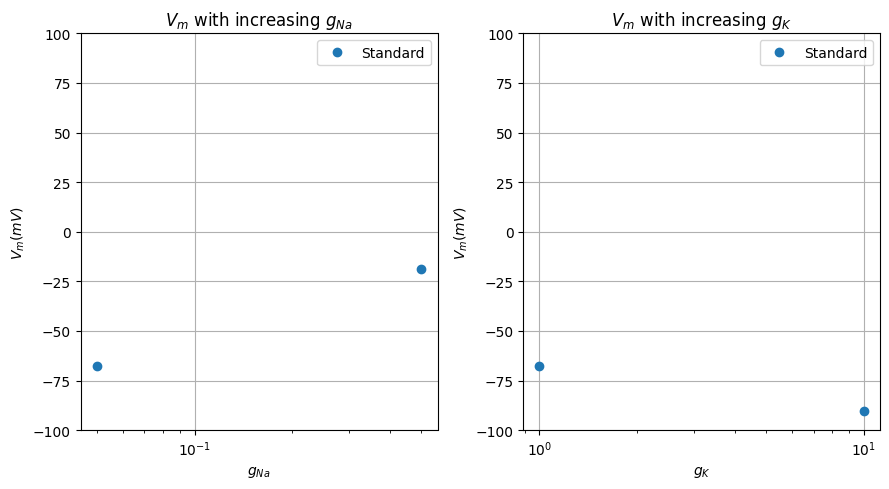

In [27]:
# @title
##################################################################################################
def vm_goldmann(g_Na=g_Na_standard,
                g_K=g_K_standard,
                Na_in=Na_in_standard,
                Na_out=Na_out_standard,
                K_in=K_in_standard,
                K_out=K_out_standard):
    """The Goldman-Hodgkin-Katz equation.
       input: Conductivities and concentrations in arbitrary units.
       returns: Vm in volt."""

    # RT/F at room temperature
    prefactor = 26.7e-3  # Volt

    # the conductivity weighted concentration ratio sum
    gc_ratio = (g_Na*Na_out + g_K * K_out)/(g_Na*Na_in + g_K * K_in)

    # Return the transmembrane potential
    vm = prefactor * np.log(gc_ratio)
    return vm

fig, axs = plt.subplots(1, 2, figsize=(9, 5))
g_Na_list = np.array(g_na_values)
g_K_list = np.array(g_k_values) #np.logspace(np.log10(1), 3)

for Ion_Concentration in Ion_Concentrations:
    label = Ion_Concentration.pop('label')
    axs[0].plot(g_Na_list, 1e3*vm_goldmann(g_Na=g_Na_list, **Ion_Concentration), 'o', label=label)
    axs[1].plot(g_K_list, 1e3*vm_goldmann(g_K=g_K_list, **Ion_Concentration), 'o', label=label)

axs[0].semilogx()
axs[0].set_ylabel("$V_m (mV)$")
axs[0].set_title("$V_m$ with increasing $g_{Na}$")
axs[0].set_xlabel("$g_{Na}$")
axs[0].set_ylim(-100, 100)
axs[0].grid()
axs[0].legend()

axs[1].semilogx()
axs[1].set_ylabel("$V_m (mV)$")
axs[1].set_title("$V_m$ with increasing $g_{K}$")
axs[1].set_xlabel("$g_{K}$")
axs[1].set_ylim(-100, 100)
axs[1].grid()
axs[1].legend()

fig.tight_layout()

The graphs you created are informative to answer the questions on Ilias Assignment 1.2. Go back and forth to finish this task.


## 2.2 Range of the membrane potential, based on the GHK equation
$V_m$ is the result of both, the conductivities of Na and of K. In order to illustrate the working range of the neuron's membrane, the ratio of these conductencies can be caluclated.

The ratio of Na/K conductivities can also be assessed as continuous plot.

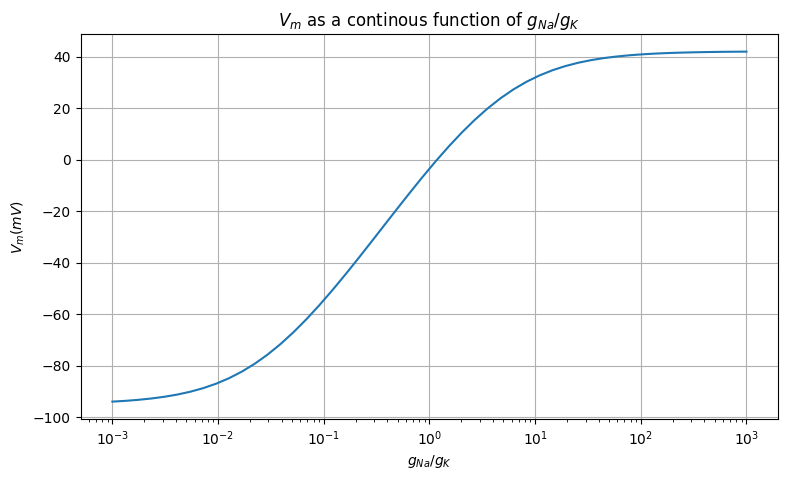

In [28]:
# @title
g_Na_list = np.logspace(-3, 3)
g_ratio_list = g_Na_list/g_K_standard
fig, ax = plt.subplots(1,1,figsize=(9,5))
ax.plot(g_ratio_list, 1e3*vm_goldmann(g_Na=g_ratio_list))

ax.semilogx()
ax.set_ylabel("$V_m (mV)$")
ax.set_title("$V_m$ as a continous function of $g_{Na} / g_K$")
ax.grid()
ax.set_xlabel("$g_{Na}/g_K$");
plt.show()

The sigmoidal curve obtained is based on combinations (ratios) of different conductivities for Sodium and Potassium. The resulting membrane potential is calculated on steady state condition described by the GHK equation. Since the conductivities for these two ions change systematically during an AP, we can use this curve to illustrate which part of the working range a neuron is using during an AP.

Complete this task by downloading the graph and annotate it according to Ilias assignment 1.3.

## 2.3 Time course of conductivities in the HH model

Up to now, we have used only the GHK equation. Now we use a model to that incorporates the Hodgkin-Huxley equation (in the *brian2* compartment model) and this allows us to describe the changing conductivities while an AP is generated.

The aim is to illustrate the rapid and transient change of Sodium conductivity and the even shorter change in the Na/K ratio of conductivities.

Note: An AP in the neuron is generated by a current injection somewhere and the AP is measured in several compartments away from that point (we later look at spreading of current in the neuron).

Further information on the HH model: https://www.sas.upenn.edu/LabManuals/BBB251/NIA/NEUROLAB/APPENDIX/EQUAT.HH/equivcrt.htm

------------------- Running simulation ---------------------
Length constante: 7.66 mm
Time constante: 2.5 ms
------------------------  Start ----------------------------
Starting simulation at t=0. s for a duration of 20. ms
20. ms (100%) simulated in < 1s
Starting simulation at t=23. ms for a duration of 30. ms
30. ms (100%) simulated in < 1s


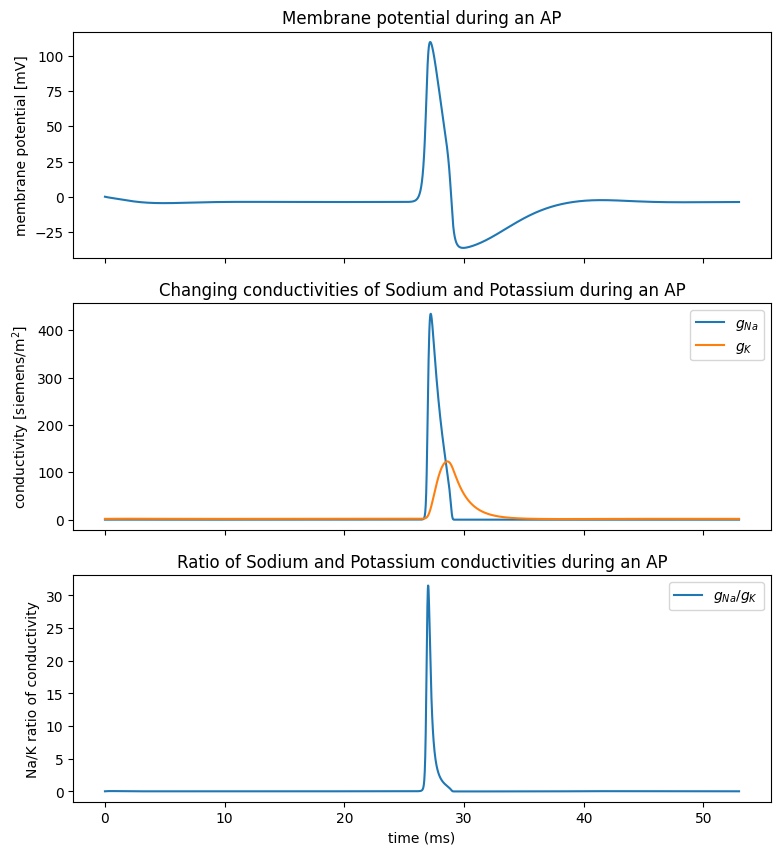

In [30]:
# @title
from scipy import stats

start_scope()
defaultclock.dt = 0.02*ms

morpho = Cylinder(length=10*cm, diameter=2*238*um, n=100)

El = 10.613*mV

ENa = 120*mV
EK = -40*mV

gl = 0.4*msiemens/cm**2
gNa0 = 120*msiemens/cm**2
gK = 36*msiemens/cm**2

# HH equations
eqs = '''
Im = gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) : amp/meter**2
I : amp (point current) # applied current
dm/dt = alpham * (1-m) - betam * m : 1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.1/mV) * 10.0*mV/exprel((-v+25.0*mV)/(10.0*mV))/ms : Hz
betam = 4 * exp(-v/(18.0*mV))/ms : Hz
alphah = 0.07 * exp(-v/(20.0*mV))/ms : Hz
betah = 1/(exp((-v+30.0*mV) / (10.0*mV)) + 1)/ms : Hz
alphan = (0.01/mV) * 10.0*mV/exprel((-v+10.0*mV)/(10.0*mV))/ms : Hz
betan = 0.125*exp(-v/(80.0*mV))/ms : Hz
gNa : siemens/meter**2
gNaTotal = gNa * m**3 *h : siemens/meter**2
gKTotal = gK * n**4 : siemens/meter**2
'''

neuron = SpatialNeuron(morphology=morpho, model=eqs, method="exponential_euler",
                       #refractory="m > 0.4", threshold="m > 0.5",
                       Cm=1*uF/cm**2, Ri=35.4*ohm*cm)
neuron.v = 0*mV
neuron.h = 0.76264973
neuron.m = 0.03339424
neuron.n = 0.2619354
neuron.I = 0*amp
neuron.gNa = gNa0

M = StateMonitor(neuron, ('v', 'gNaTotal', 'gKTotal'), record=[50])

la = neuron.space_constant[0]
print('------------------- Running simulation ---------------------')
print("Length constante: %s" % la.in_best_unit(2))
print("Time constante:", (neuron.Cm[0]/gl).in_best_unit(2))
print('------------------------  Start ----------------------------')

run(20*ms, report='text')
#print(neuron.h)
#print(neuron.n)
#print(neuron.m)
#1/0
neuron.I[0] = 1*uA # current injection at one end
run(3*ms)
neuron.I = 0*amp
run(30*ms, report='text')

### add a plot with membrane potential during an AP
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(9,10), sharex=True)
i = -1#50
ax1.plot(M.t/ms, (M.v.T[:, i]-0*mV)/(mV))
ax1.set_ylabel('membrane potential [mV]')
#ax1.set_xlabel('time')
ax1.set_title('Membrane potential during an AP')


#fig, ax = plt.subplots(1,1,figsize=(9,5))
i = -1#50
gNatot = M.gNaTotal.T[:, i]
ax2.plot(M.t/ms, M.gNaTotal.T[:, i]/(siemens/meter**2), label = '$g_{Na}$')
ax2.plot(M.t/ms, M.gKTotal.T[:, i]/(siemens/meter**2), label = '$g_{K}$')
ax2.set_ylabel('conductivity [siemens/m$^2$]')
#ax2.set_xlabel('time')
ax2.set_title('Changing conductivities of Sodium and Potassium during an AP')
ax2.legend()



#fig, ax = plt.subplots(1,1,figsize=(9,5))
i = -1#50
gNatot = M.gNaTotal.T[:, i]
ax3.plot(M.t/ms, M.gNaTotal.T[:, i]/M.gKTotal.T[:, i], label = '$g_{Na}/g_{K}$')
ax3.set_ylabel('Na/K ratio of conductivity')
ax3.set_xlabel('time (ms)')
ax3.set_title('Ratio of Sodium and Potassium conductivities during an AP')
ax3.legend()


Inspect the three graphs. The first graph pretty much looks like an AP and is based on the *brian2* simulation of the Hodgkin-Huxley equation.

The second graph depicts the underlying changes of conductivities that lead to the voltage changes across the membrane.

The third graph illustrates the ratio of NA/K conductivities, a measure that is same to what we calculated before with the GHK equation.

Take the readings of the graph and check how good it matches to the annotated graph you uploaded already on Ilias.

**Before moving on to the next section, make sure you understood the first plot by answering the following questions to yourself:**
Why is the signal (AP) depicted at around 25 ms?

Where, at what location in the compartment model is the signal recorded, assuming a propagation velocity of 10 m/s?

# 3. Hodgkin-Huxley simulations

## 3.1 Propagation of an AP

An AP is a rapid and propagating change of the transmembrane potential. There are many models to describe such a process.
The most famous one is the HH model, which is a very detailed purely electrical model.

The HH model uses the GHK equation and describes the changing conductivities with
voltage and time dependent expressions. Conceptually, the changing conductivities correspond to ion channels in real neurons.
The full HH model contains more than 20 constant parameters and 3 internal variables (m, n, h) to account for the experimentally observed properties of neurons. The multitude of parameters allow the generation of very different APs (in shape and dynamics). However, some of the parameters such as the parameters m, n and h do not have direct correlates in a real neuron.

The implementation of the HH model in a compartment model as in brian2 allows to study the propagation of AP.

Aim of this exercise is to explore the influence of some of the parameters and neuron morphology on AP propagation velocity.

The following code simuates a HH-model generated AP, calculates the propagation velocity and plots the AP at different positions along a (virtual) axon. The blue lines are with arbitrary, standard values and in orange variations of the standard parameters are plotted.

In the following simulation, the axon (the compartments in the simulation) is almost half a millimeter thick and the resulting AP propagation velocity is rather disenchanting (around 12 m/s). Remember form the lecture, the leak current might influence the AP propagation velocity. We can change this leak current by decreasing $g_L$ drastically, as done below (in orange). A reduced leak current might be achieved by a myelinated axon in real neurons. Note, dividing $g_L$ by 2 would double the so called Electrotonic length or length constant $\lambda$.

Change the parameters below and observe the changes in the plot.

In [36]:
# The following standard parameter sets are used for the blue lines.
HH_parameters = [
    {
    'Cm': 1 * uF / cm**2,
    'Ri': 35.4 * ohm * cm,
    'gl': 0.4 * msiemens / cm**2,
    'diameter': 2 * 238 * um,
    'label': 'Standard'
    },
############################################## TODO ##############################################
# The following parameter sets can be changed for exploration and are plotted in orange.
    {
    'Cm': 1 * uF / cm**2,
    'Ri': 35.4 * ohm * cm,
    'gl': 0.004 * msiemens / cm**2,
    'diameter': 2 * 238 * um,
    'label': 'no leak'
    },
##################################################################################################
]

------------------- Running simulation ---------------------
Relaxed: Length constante: 6.28 mm
Relaxed: Time constante: 2.5 ms
------------------------  Done  ----------------------------
  Velocity = 12.02 m/s
------------------- Running simulation ---------------------
Relaxed: Length constante: 28.35 mm
Relaxed: Time constante: 250. ms
------------------------  Done  ----------------------------
  Velocity = 12.38 m/s


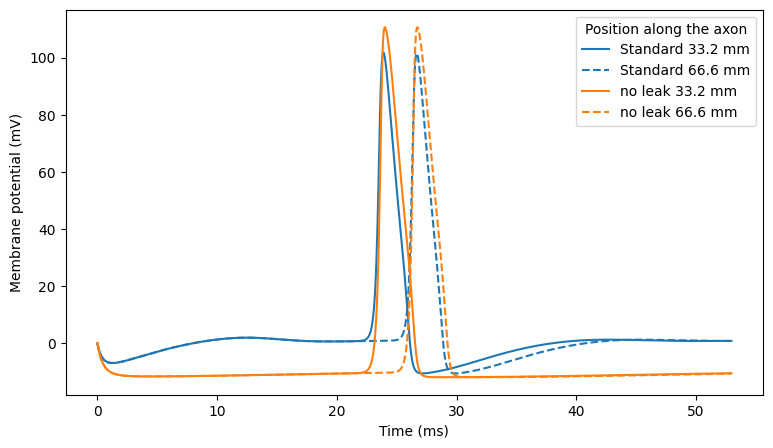

In [39]:
# @title
from scipy import stats

fig, ax = plt.subplots(1,1, figsize=(9,5))

for HH_parameter in HH_parameters:

    Cm = HH_parameter['Cm']
    Ri = HH_parameter['Ri']
    gl = HH_parameter['gl']
    diameter = HH_parameter['diameter']
    label = HH_parameter['label']

    start_scope()
    defaultclock.dt = 0.05*ms

    morpho = Cylinder(length=10*cm, diameter=diameter, n=500)

    El = 10.613*mV
    ENa = 115*mV
    EK = -12*mV
    gNa0 = 120*msiemens/cm**2
    gK = 36*msiemens/cm**2
    gl = gl

    # HH equations
    eqs = '''
    Im = gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) : amp/meter**2
    I : amp (point current) # applied current
    dm/dt = alpham * (1-m) - betam * m : 1
    dn/dt = alphan * (1-n) - betan * n : 1
    dh/dt = alphah * (1-h) - betah * h : 1
    alpham = (0.1/mV) * 10.0*mV/exprel((-v+25.0*mV)/(10.0*mV))/ms : Hz
    betam = 4 * exp(-v/(18.0*mV))/ms : Hz
    alphah = 0.07 * exp(-v/(20.0*mV))/ms : Hz
    betah = 1/(exp((-v+30.0*mV) / (10.0*mV)) + 1)/ms : Hz
    alphan = (0.01/mV) * 10.0*mV/exprel((-v+10.0*mV)/(10.0*mV))/ms : Hz
    betan = 0.125*exp(-v/(80.0*mV))/ms : Hz
    gNa : siemens/meter**2
    '''

    neuron = SpatialNeuron(morphology=morpho, model=eqs, method="exponential_euler",
                           refractory="m > 0.4", threshold="m > 0.5",
                           Cm=Cm, Ri=Ri)
    neuron.v = 0*mV
    neuron.h = 1
    neuron.m = 0
    neuron.n = .5
    neuron.I = 0*amp
    neuron.gNa = gNa0
    M = StateMonitor(neuron, ('v', 'gNa'), record=True)
    spikes = SpikeMonitor(neuron)


    report=None
    print('------------------- Running simulation ---------------------')
    #la = neuron.space_constant[0]
    #print("Init: Length constante: %s" % la.in_best_unit(2))
    #print("Init: Time constante:", (neuron.Cm[0]/gl).in_best_unit(2))
    run(20*ms, report=report)
    la = neuron.space_constant[0]
    print("Relaxed: Length constante: %s" % la.in_best_unit(2))
    print("Relaxed: Time constante:", (neuron.Cm[0]/gl).in_best_unit(2))
    neuron.I[0] = 3*uA # current injection at one end
    #la = neuron.space_constant[0]
    #print("Post stimulation: Length constante: %s" % la.in_best_unit(2))
    #print("Post stimulation: Time constante:", (neuron.Cm[0]/gl).in_best_unit(2))
    run(3*ms, report=report)
    neuron.I = 0*amp
    run(30*ms, report=report)

    # Calculation of velocity
    slope, intercept, r_value, p_value, std_err = stats.linregress(spikes.t/second,
                                                    neuron.distance[spikes.i]/meter)
    print('------------------------  Done  ----------------------------')
    print("  Velocity = %.2f m/s" % slope)

    i = morpho.n//3
    ln = ax.plot(M.t/ms, M.v[i,:]/mV,
         label=label+' '+str(morpho.distance[i]-morpho.distance[0]))
    i = 2*morpho.n//3
    ax.plot(M.t/ms, M.v[i,:]/mV, '--', color=ln[0].get_color(),
         label=label+' '+str(morpho.distance[i]-morpho.distance[0]))
    legend(title='Position along the axon')
    ylabel('Membrane potential (mV)')
    xlabel('Time (ms)')


Maybe to your surprise, the AP propagation velocity is not much faster, even with a highly insulated axon. How much faster (%) is it?

Calculate the relation of AP propagation velocity and the length constant ($\lambda$). Is the length constant a good predictor for propagation velocity?

(You can find the results (values) of the simulation right above the graph).

Complete the task in Ilias assignment 1.4 (AP propagation).

## 3.2 Modulation of AP-shape with HH simulations

John von Neuman once said:

    Give me three parameters and I can Fit an Elephant, give me four and i can make him wiggle his trunk.

The HH model allows shaping an AP in all kind of ways. How informative this is, depends on the experiment in real neurons to test hypotheses.
One successful approach is to compare the effect of drugs on VGIC (voltage gated ion channels). Many toxins change the properties of VGICs. These toxins (drugs) are very useful in understanding the properties of ion channels, and also are investigated as potential therapeutic agents. The HH model is helpful to understand the effect of drugs on specific channels.

Aim of this exercise is to manipulate one parameter that has strong impact on the shape of an AP. This parameter is also modulated in real neurons. After running the two parameter code-cells and the plot, identify in the parameter settings and which parameter is different.

In [ ]:
# HH with standard parameters (plotted in blue)

HH_parameter = {
    'Cm': 1 * uF / cm**2,
    'Ri': 35.4 * ohm * cm,
    'gl': 0.4 * msiemens / cm**2,
    'diameter': 2 * 238 * um,
    'label': 'Standard'
}
Cm = HH_parameter['Cm']
Ri = HH_parameter['Ri']
gl = HH_parameter['gl']
diameter = HH_parameter['diameter']
label = HH_parameter['label']


defaultclock.dt = 0.05 * ms

morpho = Cylinder(length=10 * cm, diameter=diameter, n=500)

El = 10.613 * mV
ENa = 115 * mV
EK = -40 * mV
gNa0 = 120 * msiemens / cm**2
gK = 36 * msiemens / cm**2
gl = gl

In [40]:
# @title
# HH code with standard parameters


# HH equations
eqs = '''
Im = gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) : amp/meter**2
I : amp (point current) # applied current
dm/dt = alpham * (1-m) - betam * m : 1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.1/mV) * 10.0*mV/exprel((-v+25.0*mV)/(10.0*mV))/ms : Hz
betam = 4 * exp(-v/(18.0*mV))/ms : Hz
alphah = 0.07 * exp(-v/(20.0*mV))/ms : Hz
betah = 1/(exp((-v+30.0*mV) / (10.0*mV)) + 1)/ms : Hz
alphan = (0.01/mV) * 10.0*mV/exprel((-v+10.0*mV)/(10.0*mV))/ms : Hz
betan = 0.125*exp(-v/(80.0*mV))/ms : Hz
gNa : siemens/meter**2
'''
start_scope()
neuron = SpatialNeuron(morphology=morpho,
                       model=eqs,
                       method="exponential_euler",
                       refractory="m > 0.4",
                       threshold="m > 0.5",
                       Cm=Cm,
                       Ri=Ri)
neuron.v = 0 * mV
neuron.h = 1
neuron.m = 0
neuron.n = .5
neuron.I = 0 * amp
neuron.gNa = gNa0
M = StateMonitor(neuron, ('v', 'gNa'), record=True)
spikes = SpikeMonitor(neuron)

la = neuron.space_constant[0]
print('------------------- Running simulation ---------------------')
print("Length constante: %s" % la.in_best_unit(2))
print("Time constante:", (neuron.Cm[0] / gl).in_best_unit(2))
print('------------------------  Start ----------------------------')

run(20 * ms, report='text')
neuron.I[0] = 3 * uA  # current injection at one end
run(3 * ms)
la = neuron.space_constant[0]
print("Length constante: %s" % la.in_best_unit(2))
neuron.I = 0 * amp
run(30 * ms, report='text')

------------------- Running simulation ---------------------
Length constante: 3.86 mm
Time constante: 250. ms
------------------------  Start ----------------------------
Starting simulation at t=0. s for a duration of 20. ms
20. ms (100%) simulated in < 1s
Length constante: 1.14 mm
Starting simulation at t=23. ms for a duration of 30. ms
30. ms (100%) simulated in < 1s


In [41]:
# HH  with modified parameters (plotted in orange)

HH_parameter = {
    'Cm': 1 * uF / cm**2,
    'Ri': 35.4 * ohm * cm,
    'gl': 0.4 * msiemens / cm**2,
    'diameter': 2 * 238 * um,
    'label': 'Standard'
}
Cm = HH_parameter['Cm']
Ri = HH_parameter['Ri']
gl = HH_parameter['gl']
diameter = HH_parameter['diameter']
label = HH_parameter['label']

start_scope()
defaultclock.dt = 0.05 * ms

morpho = Cylinder(length=10 * cm, diameter=diameter, n=500)

El = 10.613 * mV
ENa = 115 * mV
EK = -40 * mV
gNa0 = 120 * msiemens / cm**2
gK = 9 * msiemens / cm**2
gl = gl

In [42]:
# @title
# HH code with modified parameters

# HH equations
eqs = '''
Im = gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) : amp/meter**2
I : amp (point current) # applied current
dm/dt = alpham * (1-m) - betam * m : 1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.1/mV) * 10.0*mV/exprel((-v+25.0*mV)/(10.0*mV))/ms : Hz
betam = 4 * exp(-v/(18.0*mV))/ms : Hz
alphah = 0.07 * exp(-v/(20.0*mV))/ms : Hz
betah = 1/(exp((-v+30.0*mV) / (10.0*mV)) + 1)/ms : Hz
alphan = (0.01/mV) * 10.0*mV/exprel((-v+10.0*mV)/(10.0*mV))/ms : Hz
betan = 0.125*exp(-v/(80.0*mV))/ms : Hz
gNa : siemens/meter**2
'''

neuron = SpatialNeuron(morphology=morpho,
                       model=eqs,
                       method="exponential_euler",
                       refractory="m > 0.4",
                       threshold="m > 0.5",
                       Cm=Cm,
                       Ri=Ri)
neuron.v = 0 * mV
neuron.h = 1
neuron.m = 0
neuron.n = .5
neuron.I = 0 * amp
neuron.gNa = gNa0
M_drugged = StateMonitor(neuron, ('v', 'gNa'), record=True)
spikes = SpikeMonitor(neuron)

la = neuron.space_constant[0]
print('------------------- Running simulation ---------------------')
print("Length constante: %s" % la.in_best_unit(2))
print("Time constante:", (neuron.Cm[0] / gl).in_best_unit(2))
print('------------------------  Start ----------------------------')

run(20 * ms, report='text')
neuron.I[0] = 3 * uA  # current injection at one end
run(3 * ms)
la = neuron.space_constant[0]
print("Length constante: %s" % la.in_best_unit(2))
neuron.I = 0 * amp
run(30 * ms, report='text')

------------------- Running simulation ---------------------
Length constante: 5.91 mm
Time constante: 2.5 ms
------------------------  Start ----------------------------
Starting simulation at t=0. s for a duration of 20. ms
20. ms (100%) simulated in < 1s
Length constante: 1.53 mm
Starting simulation at t=23. ms for a duration of 30. ms
30. ms (100%) simulated in < 1s


Plotting the two

(-5.0, 10.0)

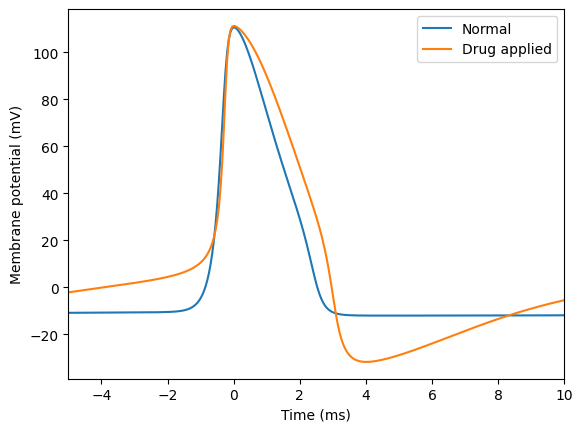

In [43]:
# @title
fig, ax = plt.subplots(1,1)

# Normal
i = morpho.n//3
imax = np.argmax(M.v[i,:])
ln = ax.plot((M.t-M.t[imax])/ms, M.v[i,:]/mV,
     label='Normal')
legend(title='Position along the axon')
ylabel('Membrane potential (mV)')
xlabel('Time (ms)')


# Drug applied
i = morpho.n//3

imax = np.argmax(M_drugged.v[i,:])
ln = ax.plot((M_drugged.t-M_drugged.t[imax])/ms, M_drugged.v[i,:]/mV,
     label='Drug applied')
legend()
ylabel('Membrane potential (mV)')
xlabel('Time (ms)')

ax.set_xlim(-5, 10)

Complete the task on channel modulation in Ilias assignment 1.4 (AP propagation).

# 4. Current injection into a passive cable

What happens when current is injected in a thin nerve fiber, how does the current spread?

When current is injected into a neuron, mimicking the inflow of sodium, current flows inside and across the membrane.

[THINK: Why is a current injection similar to an action potential?]

Due to electroneutrality, a current loop is formed. For a computational simulation of the current flow, an axon can be described by a series of identical compartments, and each compartment is represented by an equivalent circuit, shown below. The resistivity of the axoplasm is called Rho (𝜌𝑖). The membrane has the material-specific conductivity 𝑔𝑚 and capacity 𝑐𝑚. The geometry of the compartment is given by its diameter 𝑑 and length 𝐿.

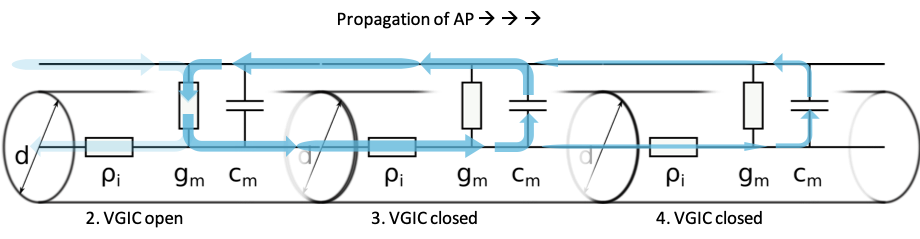

## 4.1 Current is generating changes in membrane potential
We use the brian2 simulation as before but without the implementation of the HH equations. Thus, only the cable properties are investigated.

In the following code, current is injected at one end of a finite (not infinite) passive fiber. The two following code-cells are comparing changes in membrane potential (depolarization) along the axon, first with different leak currents and the second code-cell with different membrane capacity.

You can change the pair of parameters in the code directly (line 4, in the for loop) if you would like to explore further.

**Pair of different gL**

1. S/(m^2):
Cm = 0.01 F/(m^2)
gL = 1. S/(m^2)
Length constant = 0.41 mm
Length constant (theory) = 0.41 mm
Time constant = 10. ms
0.5 S/(m^2):
Cm = 0.01 F/(m^2)
gL = 0.5 S/(m^2)
Length constant = 0.58 mm
Length constant (theory) = 0.58 mm
Time constant = 20. ms


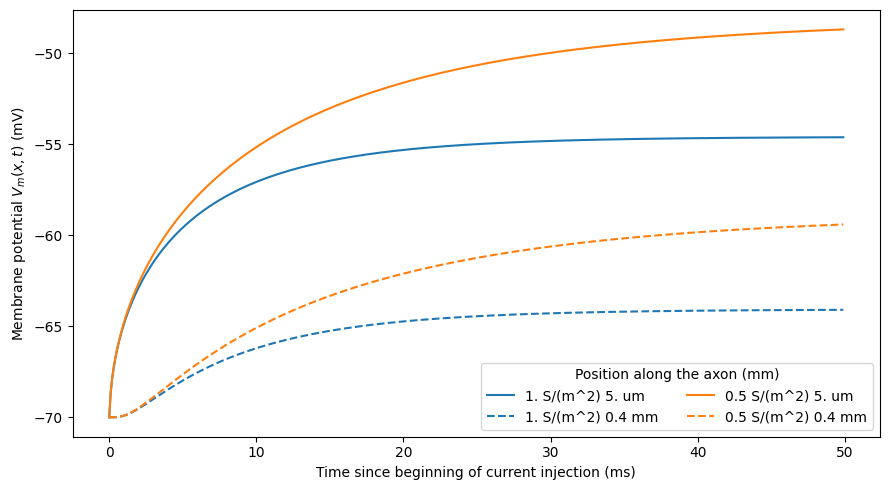

In [55]:
# @title
############################################## TODO ##############################################
# The following parameter pairs are used in the simulation below.
# Change the pair of values in the for loop, here for gL.
fig, ax = plt.subplots(1,1, figsize=(9, 5))
for gL in [1e-4*siemens/cm**2, 0.5e-4*siemens/cm**2]:
 label = gL.in_best_unit()
 Cm = 1*uF/cm**2
 diameter = 1*um
 ##################################################################################################

 # Morphology
 length = 2*mm
 Ri = 150*ohm*cm
 N = 200

 # Passive channels
 EL = -70*mV
 eqs = '''
 Im = gL * (EL - v) : amp/meter**2
 I : amp (point current)
 '''

 start_scope()
 defaultclock.dt = 0.1*ms
 morpho = Cylinder(diameter=diameter, length=length, n=N)

 neuron = SpatialNeuron(morphology=morpho, model=eqs, Cm=Cm, Ri=Ri,
                       method='exponential_euler')
 neuron.v = EL
 M = StateMonitor(neuron, 'v', record=[0, 39])


 print("%s:" % label)
 print("Cm =", Cm.in_best_unit(3))
 print("gL =", gL)

 la = neuron.space_constant[0]
 print("Length constant = %s" % la.in_best_unit(2))
 print("Length constant (theory) = %s" % (sqrt(1/(gL*pi*diameter*Ri/(pi*(diameter/2)**2))).in_best_unit(2)))
 print("Time constant = %s" % (Cm/gL).in_best_unit(2))

 # Currrent injection at one end
 neuron.I[0] = 0.02*nA

 # Running an plotting
 report = None
 run(.5*ms, report=report)
 run(4.5*ms, report=report)
 run(45*ms, report=report)

 ln = ax.plot(M.t/ms, M.v.T[:, 0]/mV, '-',
             label=label+' '+str(neuron.morphology.distance[M.record[0]].in_best_unit(2)))
 ax.plot(M.t/ms, M.v.T[:, 1]/mV, '--', color=ln[0].get_color(),
         label=label+' '+str(neuron.morphology.distance[M.record[1]].in_best_unit(2)))


ax.legend(title="Position along the axon (mm)",
         loc="best", ncol=2)  # , label=x[M.record])
ax.set_xlabel('Time since beginning of current injection (ms)')
ax.set_ylabel('Membrane potential $V_m(x, t)$ (mV)')
fig.tight_layout()

fig.show()

**Pair of different Cm**

0.01 F/(m^2):
Cm = 0.01 F/(m^2)
gL = 1. S/(m^2)
Length constant = 0.41 mm
Length constant (theory) = 0.41 mm
Time constant = 10. ms
0.02 F/(m^2):
Cm = 0.02 F/(m^2)
gL = 1. S/(m^2)
Length constant = 0.41 mm
Length constant (theory) = 0.41 mm
Time constant = 20. ms


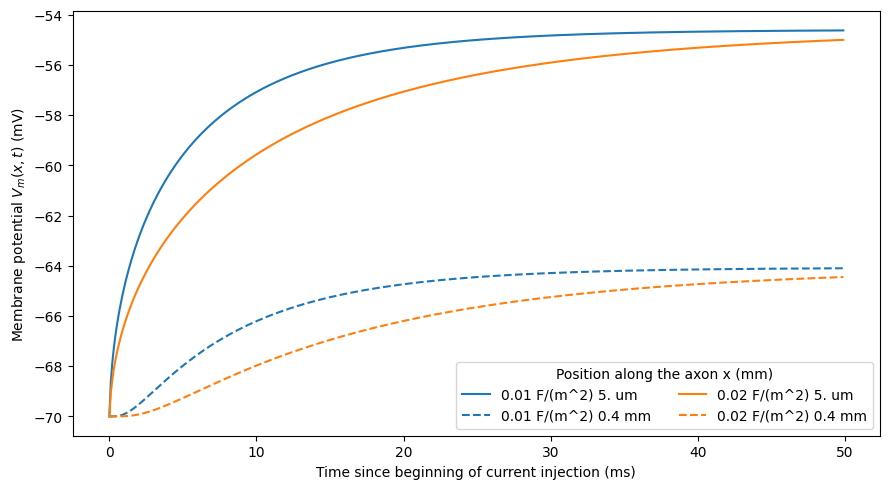

In [56]:
# @title
############################################## TODO ##############################################
# The following parameter pairs are used in the simulation below.
# Change the pair of values in the for loop, here for Cm.
fig, ax = plt.subplots(1,1, figsize=(9, 5))
for Cm in [1*uF/cm**2, 2*uF/cm**2]:
 label = Cm.in_best_unit()
 gL = 1e-4*siemens/cm**2

 ##################################################################################################

 # Morphology
 length = 2*mm
 Ri = 150*ohm*cm
 N = 200

 # Passive channels
 EL = -70*mV
 eqs = '''
 Im = gL * (EL - v) : amp/meter**2
 I : amp (point current)
 '''

 start_scope()
 defaultclock.dt = 0.1*ms
 morpho = Cylinder(diameter=diameter, length=length, n=N)

 neuron = SpatialNeuron(morphology=morpho, model=eqs, Cm=Cm, Ri=Ri,
                       method='exponential_euler')
 neuron.v = EL
 M = StateMonitor(neuron, 'v', record=[0, 39])


 print("%s:" % label)
 print("Cm =", Cm.in_best_unit(3))
 print("gL =", gL)

 la = neuron.space_constant[0]
 print("Length constant = %s" % la.in_best_unit(2))
 print("Length constant (theory) = %s" % (sqrt(1/(gL*pi*diameter*Ri/(pi*(diameter/2)**2))).in_best_unit(2)))
 print("Time constant = %s" % (Cm/gL).in_best_unit(2))

 # Currrent injection at one end
 neuron.I[0] = 0.02*nA

 # Running an plotting
 report = None
 run(.5*ms, report=report)
 run(4.5*ms, report=report)
 run(45*ms, report=report)

 ln = ax.plot(M.t/ms, M.v.T[:, 0]/mV, '-',
             label=label+' '+str(neuron.morphology.distance[M.record[0]].in_best_unit(2)))
 ax.plot(M.t/ms, M.v.T[:, 1]/mV, '--', color=ln[0].get_color(),
         label=label+' '+str(neuron.morphology.distance[M.record[1]].in_best_unit(2)))


ax.legend(title="Position along the axon x (mm)",
         loc="best", ncol=2)  # , label=x[M.record])
ax.set_xlabel('Time since beginning of current injection (ms)')
ax.set_ylabel('Membrane potential $V_m(x, t)$ (mV)')
fig.tight_layout()

fig.show()

Describe in your own words what the two graphs are showing before you complete the task in Ilias assignment 1.5 (spread of current)

# 5. Supplementary material:

## Analytic expression for the velocity
The effective $g^\star$ is around a third of the peak value of $g_{Na}$

In [48]:
Cm = 1 * uF/cm**2
diameter = 238*2*um
Ri = 36*ohm*cm
gstar = 100*siemens/meter**2

v_p = (1/(Cm)) * sqrt(diameter * gstar/(8*Ri))
v_p.in_best_unit(1)

'12.9 m s^-1'

## The conductivities and corresponding Goldman equilibrium

The following section is just a demonstration how the above provided plots are generated. Understanding the following sections is not part of the Couse.

------------------- Running simulation ---------------------
Length constante: 3.56 mm
Time constante: 2.5 ms
------------------------  Start ----------------------------
Starting simulation at t=0. s for a duration of 20. ms
20. ms (100%) simulated in < 1s
Starting simulation at t=23. ms for a duration of 30. ms
30. ms (100%) simulated in < 1s


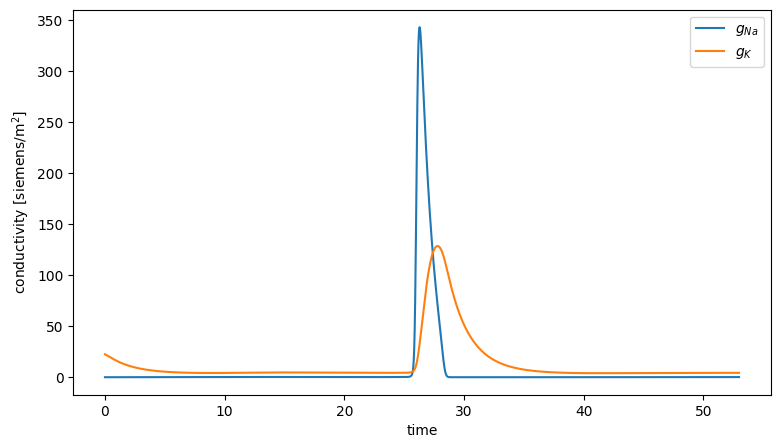

In [49]:
from scipy import stats

start_scope()
defaultclock.dt = 0.02*ms

morpho = Cylinder(length=10*cm, diameter=2*238*um, n=100)

El = 10.613*mV

ENa = 115*mV
EK = -12*mV

gl = 0.4*msiemens/cm**2
gNa0 = 120*msiemens/cm**2
gK = 36*msiemens/cm**2

# HH equations
eqs = '''
Im = gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) : amp/meter**2
I : amp (point current) # applied current
dm/dt = alpham * (1-m) - betam * m : 1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.1/mV) * 10.0*mV/exprel((-v+25.0*mV)/(10.0*mV))/ms : Hz
betam = 4 * exp(-v/(18.0*mV))/ms : Hz
alphah = 0.07 * exp(-v/(20.0*mV))/ms : Hz
betah = 1/(exp((-v+30.0*mV) / (10.0*mV)) + 1)/ms : Hz
alphan = (0.01/mV) * 10.0*mV/exprel((-v+10.0*mV)/(10.0*mV))/ms : Hz
betan = 0.125*exp(-v/(80.0*mV))/ms : Hz
gNa : siemens/meter**2
gNaTotal = gNa * m**3 *h : siemens/meter**2
gKTotal = gK * n**4 : siemens/meter**2
'''

neuron = SpatialNeuron(morphology=morpho, model=eqs, method="exponential_euler",
                       #refractory="m > 0.4", threshold="m > 0.5",
                       Cm=1*uF/cm**2, Ri=35.4*ohm*cm)
neuron.v = 0*mV
neuron.h = 1
neuron.m = 0
neuron.n = .5
neuron.I = 0*amp
neuron.gNa = gNa0

M = StateMonitor(neuron, ('v', 'gNaTotal', 'gKTotal'), record=[50])

la = neuron.space_constant[0]
print('------------------- Running simulation ---------------------')
print("Length constante: %s" % la.in_best_unit(2))
print("Time constante:", (neuron.Cm[0]/gl).in_best_unit(2))
print('------------------------  Start ----------------------------')

run(20*ms, report='text')
neuron.I[0] = 1*uA # current injection at one end
run(3*ms)
neuron.I = 0*amp
run(30*ms, report='text')


fig, ax = plt.subplots(1,1,figsize=(9,5))
i = 0#50
gNatot = M.gNaTotal.T[:, i]
ax.plot(M.t/ms, M.gNaTotal.T[:, i]/(siemens/meter**2), label = '$g_{Na}$')
ax.plot(M.t/ms, M.gKTotal.T[:, i]/(siemens/meter**2), label = '$g_{K}$')
ax.set_ylabel('conductivity [siemens/m$^2$]')
ax.set_xlabel('time')
ax.legend()

In [ ]:
prefactor = 26.7e-3 * volt
K_out_HH = K_in_standard *exp(-12*mV/prefactor )
#vm_goldmann(g_K=1e99, K_out=K_out_HH)*volt
Na_out_HH = Na_in_standard *exp(115*mV/prefactor )
#vm_goldmann(g_Na=1e99, Na_out=Na_out_HH)*volt

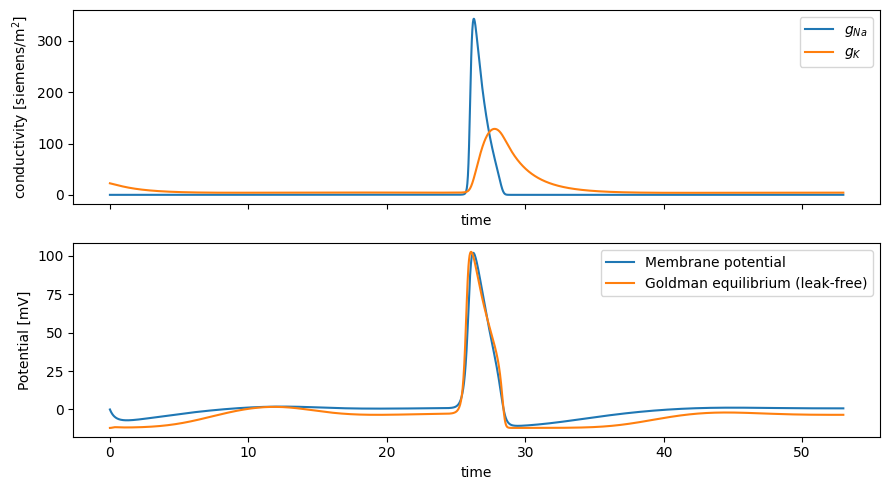

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(9, 5), sharex=True)
i = 0#50
gNatot = M.gNaTotal.T[:, i]
axs[0].plot(M.t/ms, M.gNaTotal.T[:, i]/(siemens/meter**2), label = '$g_{Na}$')
axs[0].plot(M.t/ms, M.gKTotal.T[:, i]/(siemens/meter**2), label = '$g_{K}$')

axs[0].set_ylabel('conductivity [siemens/m$^2$]')
axs[0].set_xlabel('time')
axs[0].legend()

axs[1].plot(M.t/ms, M.v.T[:, i]/mV, label='Membrane potential')
axs[1].plot(M.t/ms, vm_goldmann(g_Na=M.gNaTotal.T[:, i],
                                g_K=M.gKTotal.T[:, i],
                                Na_out=Na_out_HH,
                                K_out=K_out_HH,
                                )/mV, label = 'Goldman equilibrium (leak-free)')

axs[1].set_ylabel('Potential [mV]')
axs[1].set_xlabel('time')
axs[1].legend()
fig.tight_layout()